In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob

%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 14) # (w, h)

['main_img_pdf\\print-classic-main-1.png',
 'main_img_pdf\\print-classic-main-2.png',
 'main_img_pdf\\print-classic-main-3.png',
 'main_img_pdf\\print-classic-main-4.png',
 'main_img_pdf\\print-classic-main-5.png',
 'main_img_pdf\\print-classic-main-6.png',
 'main_img_pdf\\print-classic-main-7.png',
 'main_img_pdf\\print-classic-main-8.png']

In [94]:
originals = []
names = []
for file in glob.glob('main_img_pdf/*'):
    originals.append(cv2.imread(file))
    names.append(file)
len(originals)

8

In [95]:
init_pos = np.array([165, 177])
init_end = np.array([495, 507])
box_w, box_h = init_end - init_pos
box = [
       [0, 0],
       [box_w, 0],
       [box_w, box_h],
       [0, box_h]
      ]
box_w, box_h

(330, 330)

In [96]:
for i, img_i in enumerate(originals):
    originals[i] = img_i[init_pos[1]:-init_pos[1], init_pos[0]:-init_pos[0]]

In [97]:
cards = []
for img in originals:
    for y in range(0, img.shape[0], box_h+1):
        for x in range(0, img.shape[1], box_w):
            if img[y+1:y+box_h-1, x+1:x+box_w-1].shape[1] > 50:
                cards.append(img[y+1:y+box_h-1, x+1:x+box_w-1])
cards = np.array(cards)
cards.shape

(192, 328, 328, 3)

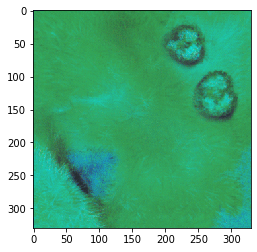

In [98]:
plt.imshow(originals[0][0:330, 0:330])

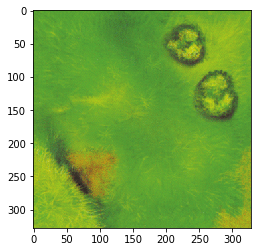

In [99]:
plt.imshow(cards[0][:,:,::-1])

In [100]:
cards_mean_clrs = np.zeros(len(cards))
for i in range(len(cards)):
    img = cv2.cvtColor(cards[i], cv2.COLOR_RGB2GRAY)
    cards_mean_clrs[i] = img.mean()

In [101]:
cards = cards[np.argsort(cards_mean_clrs)]

In [319]:
import random
def addTransparentCorners(image):
    mask = np.zeros(image.shape)
    height, width, channels = image.shape

    border_radius = 20
    line_thickness = 15
    edge_shift = int(line_thickness/2.0) + 7

    color = (255, 255, 255)

    #draw lines
    #top
    cv2.line(mask, (border_radius, edge_shift), 
    (width - border_radius, edge_shift), color, line_thickness)
    #bottom
    cv2.line(mask, (border_radius, height-line_thickness), 
    (width - border_radius, height-line_thickness), color, line_thickness)
    #left
    cv2.line(mask, (edge_shift, border_radius), 
    (edge_shift, height  - border_radius), color, line_thickness)
    #right
    cv2.line(mask, (width - line_thickness, border_radius), 
    (width - line_thickness, height  - border_radius), color, line_thickness)
    #inner
    cv2.rectangle(mask, (border_radius, edge_shift), 
    (width - line_thickness, height  - border_radius), color, -1)
    
    return np.concatenate([image[:, :, :3], mask[:, :, :1]], axis=2)

In [321]:
new_cards = []
for card_i in cards:
    new_cards.append(addTransparentCorners(card_i))
cards = np.array(new_cards)
cards.shape

(75, 512, 366, 4)

In [26]:
len(cards)

192

In [102]:
for i, card_i in enumerate(cards):
    cv2.imwrite(f'res/{i}.png', card_i)

In [313]:
for i, card_i in enumerate(cards):
    max_side = max(card_i.shape)
    resize_rate = 512 / max_side
    x, y = card_i.shape[:2]
#     cv2.imwrite(f'res/{i}.png', cv2.resize(card_i, (int(y * resize_rate), int(x * resize_rate))))